<a href="https://colab.research.google.com/github/smahesh2694/NEU_XAI/blob/master/severstal_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import cv2
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
cd /content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/train

/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/train


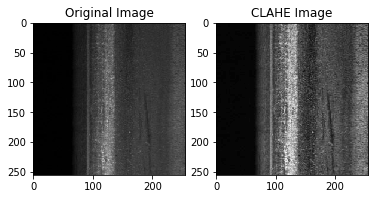

In [5]:
from google.colab.patches import cv2_imshow

folder = '2/'
files = os.listdir(folder)

ip_img_gray = cv2.imread(folder+files[142], 0)
# histeq_img = cv2.equalizeHist(ip_img_gray)

'''
  Contrast Limited Adaptive Histogram Equalization
  https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html
'''
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  
clahe_img_gray = clahe.apply(ip_img_gray)

ip_img = cv2.cvtColor(ip_img_gray, cv2.COLOR_GRAY2BGR)
clahe_img = cv2.cvtColor(clahe_img_gray, cv2.COLOR_GRAY2BGR)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(ip_img)
fig.add_subplot(1, 2, 2)
plt.title("CLAHE Image")
plt.imshow(clahe_img)


In [23]:
files[44]

'45.png'

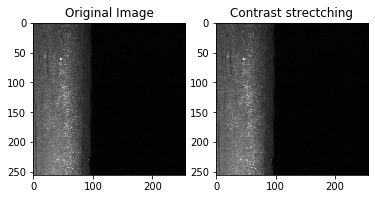

In [59]:
from google.colab.patches import cv2_imshow

folder = '2/'
files = os.listdir(folder)

ip_img_gray = cv2.imread(folder+files[94], 0)

dummy = np.zeros((ip_img_gray.shape[0], ip_img_gray.shape[1]), dtype='uint8')

min_val = np.min(ip_img_gray)
max_val = np.max(ip_img_gray)

for i in range(ip_img_gray.shape[0]):
  for j in range(ip_img_gray.shape[1]):
    dummy[i,j] = 255 * ((ip_img_gray[i,j] - min_val) / max_val - min_val)

ip_img = cv2.cvtColor(ip_img_gray, cv2.COLOR_GRAY2BGR)
dummy_rgb = cv2.cvtColor(dummy, cv2.COLOR_GRAY2BGR)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(ip_img)
fig.add_subplot(1, 2, 2)
plt.title("Contrast strectching")
plt.imshow(dummy_rgb)

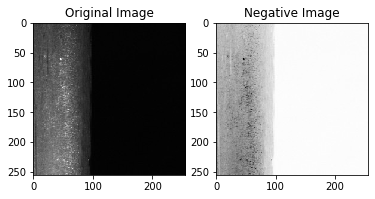

In [60]:
# ip_img = cv2.imread(folder+files[94])

# neg_img = 255 - ip_img

# fig = plt.figure()
# fig.add_subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(ip_img)
# fig.add_subplot(1, 2, 2)
# plt.title("Negative Image")
# plt.imshow(neg_img)

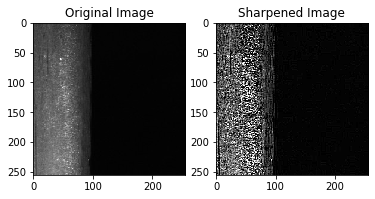

In [63]:
ip_img = cv2.imread(folder+files[94])

# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernal = np.array([[0,-1,0],[-1,7,-1],[0,-1,0]])
sharp_img = cv2.filter2D(ip_img, -1, kernel)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(ip_img)
fig.add_subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharp_img)

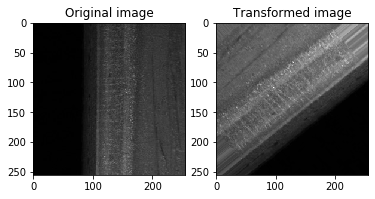

In [66]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2
import matplotlib.pyplot as plt

ip_img = cv2.imread(folder+files[9])
ip_array = np.array(ip_img)

datagen = ImageDataGenerator()

transform_img = datagen.apply_transform(
                                        x = ip_array,
                                        transform_parameters =
                                            {
                                                'theta' : random(45,
                                                'brightness':1,
                                                'tx':0.2,
                                                'ty':0.3,
                                                'shear':10,
                                                'zx':0.9,
                                                'zy':0.9,
                                                'flip_horizontal':True,
                                                'flip_vertical':True

                                            }                                                                                        
                                        )

f = plt.figure()
f.add_subplot(1,2,1)
plt.title("Original image")
plt.imshow(ip_img)
f.add_subplot(1,2,2)
plt.title("Transformed image")
plt.imshow((transform_img).astype(np.uint8))

plt.show(block=True)a

Structural Similarity : 0.2078


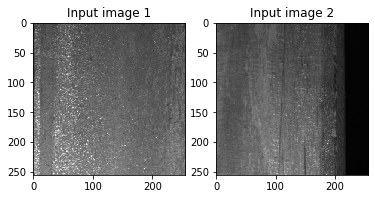

In [10]:
from skimage.metrics import structural_similarity as ssim

ip_img_1 = cv2.imread(folder+files[44])
ip_img_2 = cv2.imread(folder+files[16])

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.title("Input image 1")
plt.imshow(ip_img_1)
fig.add_subplot(1,2,2)
plt.title("Input image 2")
plt.imshow(ip_img_2)

score, diff = ssim(ip_img_1, ip_img_2, multichannel=True, full = True)
'''
    @returns:
    {float} a float {-1:1} that measures structural similarity
      between the input images
'''
print("Structural Similarity : %0.4f" %score)

# diff = (diff * 255).astype("uint8")
# cv2_imshow(diff)


In [57]:
from scipy.stats import wasserstein_distance

img_a = cv2.imread(folder+files[44],0)
img_b = cv2.imread(folder+files[16],0)

'''
  hist is a 256x1 array, each value corresponds to number of pixels in that image with its corresponding pixel value.
'''
hist_a = cv2.calcHist([img_a],[0],None,[256],[0,256])
hist_b = cv2.calcHist([img_b],[0],None,[256],[0,256])

'''
  Computes the first Wasserstein distance between two 1D distributions.
'''
wd = wasserstein_distance(np.ravel(hist_a), np.ravel(hist_b))
print("Wasserstein Distance : %0.4f" %wd)

Wasserstein Distance : 75.6484


In [58]:
from scipy.stats import wasserstein_distance

def get_histogram(img):
  '''
  Get the histogram of an image. For an 8-bit, grayscale image, the
  histogram will be a 256 unit vector in which the nth value indicates
  the percent of the pixels in the image with the given darkness level.
  The histogram's values sum to 1.
  '''
  h, w = img.shape
  hist = [0.0] * 256
  for i in range(h):
    for j in range(w):
      hist[img[i, j]] += 1
  return np.array(hist) / (h * w) 

img_a = cv2.imread(folder+files[44],0)
img_b = cv2.imread(folder+files[16],0)

hist_a = get_histogram(img_a)
hist_b = get_histogram(img_b)
wd = wasserstein_distance(hist_a, hist_b)
print(wd)

0.0011543035507202148


In [32]:
import keras
from keras.applications import ResNet101V2

img_height = 224
img_width = 224

base_model = ResNet101V2(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))













171319296/171317808 [==============================] - 2s 0us/step


In [33]:
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from keras.models import Model

num_classes = 5

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x) 
preds = Dense(num_classes, activation= 'softmax')(x)

model = Model(inputs = base_model.input, outputs = preds)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
conv = 0
print("Total layers in ResNet101V2 : ", len(model.layers))

for i in range(len(model.layers)):
            if type(model.layers[i]) == keras.layers.convolutional.Conv2D:
                conv += 1
                
print("No. of Conv2D layers : ", conv)

Total layers in ResNet101V2 :  381
No. of Conv2D layers :  104


In [0]:
# set the base model to be not trainable

base_model.trainable = False

In [54]:
from keras.preprocessing.image import ImageDataGenerator

class_0_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

other_class_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     shear_range = 0.2,
                                     zoom_range = [0.3, 1.3],
                                     width_shift_range=.15,
                                     fill_mode='nearest',
                                     height_shift_range=.15,
                                     brightness_range=(0.1, 0.9),
                                     channel_shift_range=150.0,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     validation_split=0.2
                                     )

class_0_gen = class_0_datagen.flow_from_directory(
                                     directory = '/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/class_0/train',
                                     target_size=(224,224),     
                                     batch_size=16,
                                     class_mode='categorical',                                                 
                                     shuffle=True,
                                     subset='training'
                                     )

other_class_gen = other_class_datagen.flow_from_directory(
                                     directory = '/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/train',
                                     target_size=(224,224),     
                                     batch_size=16,
                                     class_mode='categorical',                                                 
                                     shuffle=True,
                                     subset='training'
                                     )



Found 13296 images belonging to 1 classes.
Found 8176 images belonging to 4 classes.


In [0]:
# train_generator = zip(class_0_gen, other_class_gen)
def combine_generator(gen1, gen2):
    while True:
        yield(next(gen1), next(gen2))

train_generator = combine_generator(class_0_gen, other_class_gen)

In [49]:
class_0_val_gen = class_0_datagen.flow_from_directory(
                                     directory = '/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/class_0/train',
                                     target_size=(224,224),     
                                     batch_size=16,
                                     class_mode='categorical',                                                 
                                     shuffle=True,
                                     subset='validation'
                                     )

other_class_val_gen = other_class_datagen.flow_from_directory(
                                     directory = '/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/train',
                                     target_size=(224,224),     
                                     batch_size=16,
                                     class_mode='categorical',                                                 
                                     shuffle=True,
                                     subset='validation'
                                     )

# val_generator = zip(class_0_val_gen, other_class_val_gen)

def combine_generator(gen1, gen2):
    while True:
        yield(next(gen1), next(gen2))

val_generator = combine_generator(class_0_val_gen, other_class_val_gen)

Found 3324 images belonging to 1 classes.
Found 2043 images belonging to 4 classes.


In [50]:
# step_size_train = (train_generator.n//train_generator.batch_size) + 1
# print("Training step size: ",step_size_train)

# step_size_val = (val_generator.n//val_generator.batch_size) + 1
# print("Validation step size: ",step_size_val)

step_size_train = (class_0_gen.n//class_0_gen.batch_size)+(other_class_gen.n//other_class_gen.batch_size)+1
print("Training step size: ",step_size_train)

step_size_val = (class_0_val_gen.n//class_0_val_gen.batch_size)+(other_class_val_gen.n//other_class_val_gen.batch_size)+1
print("Validation step size: ",step_size_val)


Training step size:  1343
Validation step size:  335


In [0]:
from keras.optimizers import SGD

sgd = SGD()

model.compile(optimizer= sgd, loss='categorical_crossentropy', metrics=['acc'])

In [52]:
from keras.callbacks import LearningRateScheduler
initial_epochs = 1       #change as per requirement

import math

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))

def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.5
  drop_every = 5.0        #change as per requirement
  lrate = initial_lrate * math.pow(drop,math.floor((1+epoch)/drop_every))
  return lrate

loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=val_generator,
                   validation_steps=step_size_val,                
                   epochs=initial_epochs,
                   callbacks = callbacks_list
                   )

Epoch 1/1


AttributeError: ignored